In [ ]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=72453d9055541b050d2e7258b986c21ec6a5a4c43862db1c3fe7dc5b795b49da
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np

import skfuzzy as fuzz

from skfuzzy import control as ctrl

In [ ]:
temperature = np.arange(15,45) ##15 ila 44 derece arasında 1 derecelik
#aralıklarla bir sıcaklık aralığı oluşturuyoruz ve bu aralığı temperature adlı
#bir NumPy dizisine atıyoruz.

In [ ]:
temp = ctrl.Antecedent(temperature, 'temp') # temp adında bir giriş değişkeni(antecedent) tanımlıyoruz. Bu değişken, odadaki sıcaklığı temsil eder.
#temperature aralığını ve "temp" adını kullanıyoruz.

In [ ]:
ac_temperature = np.arange(15,31) #15 ila 30 derece arasında 1 derecelik
#aralıklarla bir klima sıcaklık aralığı oluşturuyoruz ve bu aralığı
#ac_temperature adlı bir NumPy dizisine atıyoruz.

In [ ]:
ac_temp = ctrl.Consequent(ac_temperature, 'ac_temp')

In [ ]:
temp.automf(3)

ac_temp.automf(3) # Giriş ve çıkış değişkenlerinin bulanık mantık terimlerini
#otomatik olarak tanımlıyoruz. Her ikisi için de üç terim kullanıyoruz: "poor",
#"average", ve "good".

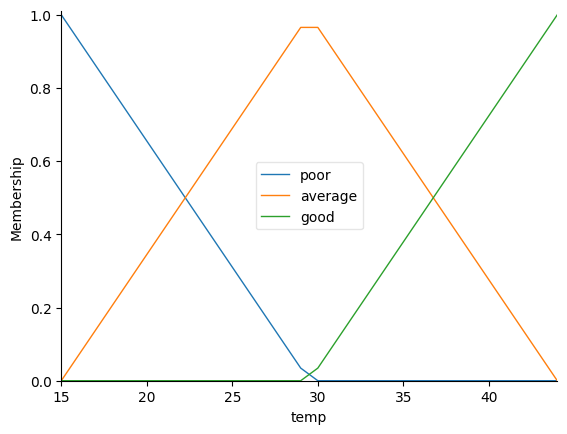

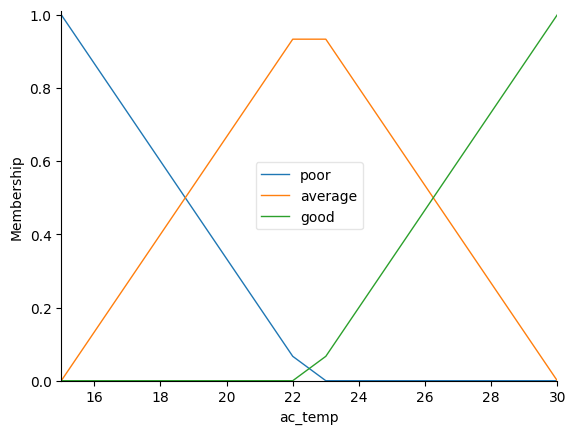

In [ ]:
temp.view()

ac_temp.view()

In [ ]:
rule1 = ctrl.Rule(temp['poor'], ac_temp['good'])

rule2 = ctrl.Rule(temp['average'], ac_temp['average'])

rule3 = ctrl.Rule(temp['good'], ac_temp['poor'])

In [ ]:
temperature_ctrl = ctrl.ControlSystem([rule1,rule2,rule3]) # Tanımladığımız
#kuralları birleştirerek bir kontrol sistemi oluşturuyoruz.

In [ ]:
detect_temp = ctrl.ControlSystemSimulation(temperature_ctrl) # Oluşturduğumuz
#kontrol sistemi üzerinde simülasyon yapmak için bir simülasyon nesnesi
#oluşturuyoruz.


When room temperature is 45°C :
The AC temperature is adjusted to 17.52212389380531 °C


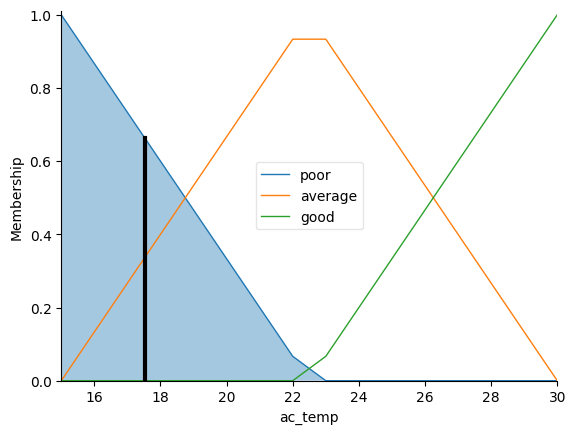

In [ ]:
detect_temp.input['temp'] = 45

detect_temp.compute() # Belirlenen giriş değerlerine göre kontrol sisteminin
#çıktılarını hesaplar ve bu hesaplamaları gerçekleştirir.

temp = detect_temp.output['ac_temp'] # Hesaplanan çıktı değerini alırız. Bu
#durumda 'ac_temp', yani klima sıcaklığı çıktısıdır.

print("\noda sıcaklığı  45°C olduğunda  :") :") # Ekrana bir bilgi yazısı
#yazdırırız, burada odanın sıcaklığının 27 derece olduğunu belirtiriz.

print("klima sıcaklığı ayarlandı",temp, "°C")

ac_temp.view(sim = detect_temp)



In [ ]:
detect_temp.input['temp'] = 30

detect_temp.compute()

temp = detect_temp.output['ac_temp']

print("\nOda sıcaklığı 27°C olduğunda  :")

print("Klima sıcaklığı ayarlandı",temp, "°C")


When room temperature is 27°C :
The AC temperature is adjusted to 22.483489479342655 °C



When room temperature is 15°C :
The AC temperature is adjusted to 27.477876106194692 °C


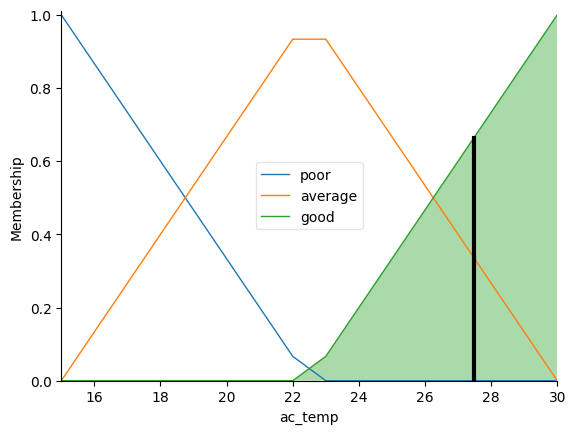

In [ ]:
detect_temp.input['temp'] = 15

detect_temp.compute() # Yeni giriş değerine göre kontrol sisteminin
#çıktılarını hesaplar ve bu hesaplamaları gerçekleştirir.

temp = detect_temp.output['ac_temp']

print("\nOda sıcaklığı 15°C olduğunda :")

print(print("Klima sıcaklığı",temp, '°C olarak ayarlanır.')  # Klima sıcaklığının
#yeni belirlenen değere göre ayarlandığını belirtiriz.

ac_temp.view(sim = detect_temp)